In [344]:
import os
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [345]:
# Change the current working directory to your desired location
new_directory = '/Users/teresaglauner/Documents/Hamburg_folder/CRC_TMA'
os.chdir(new_directory)

current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /Users/teresaglauner/Documents/Hamburg_folder/CRC_TMA


# Changing the FOV names

First, I am making use of my image_data folder to specify which FOVs I have acquired with the MIBI. 

In [346]:
# Specify the directory you want to list folders from
directory_path = '/Users/teresaglauner/Documents/Hamburg_folder/CRC_TMA/image_data'

In [347]:
# Get a list of folder names in the specified directory
folder_names = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]

In [348]:
# Create a pandas DataFrame from the folder names
folder_list = pd.DataFrame({'Folder Name': folder_names})

In [349]:
# Specify the path for the CSV file
csv_file_path = '/Users/teresaglauner/Documents/Hamburg_folder/CRC_TMA/FOV_list.csv'

# Save the DataFrame to the specified CSV file
folder_list.to_csv(csv_file_path, index=False)

print(f"Folder names have been saved to {csv_file_path}.")

Folder names have been saved to /Users/teresaglauner/Documents/Hamburg_folder/CRC_TMA/FOV_list.csv.


# Which patients with clinically relevant information have been acquired by MIBI?

Now, I want to merge the clinical data with the FOV_list so that I know which patients I have acquired since not all cores were intact

In [350]:
# Specify the path to your XLSX file
xlsx_file_path = '/Users/teresaglauner/Documents/Hamburg_folder/CRC_TMA/COL10.2 A  patho_clinical data.xlsx'

# Read the XLSX file into a DataFrame
df = pd.read_excel(xlsx_file_path)

# Now, you can work with the data in the DataFrame (e.g., print the first 5 rows)
print(df.head())


    TMA name TMA sector TMA Localisation    Tumorlokalisation COL10  \
0  COL 10.2.          A             A 1a           Kolon Sigmoideum   
1  COL 10.2.          A             A 1b           Kolon Sigmoideum   
2  COL 10.2.          A             A 1c           Kolon Sigmoideum   
3  COL 10.2.          A             A 1d  rektosigmoidaler Übergang   
4  COL 10.2.          A             A 1e           Kolon Sigmoideum   

  Tumorlokalisation alle RED Tumor Seite alle       Tumortyp pT raw pN raw  \
0                      Sigma            links  Adenokarzinom    pT3    pN0   
1                      Sigma            links  Adenokarzinom    pT3    pN0   
2                      Sigma            links  Adenokarzinom    pT4    pN0   
3                      Sigma            links  Adenokarzinom    pT3    pN0   
4                      Sigma            links  Adenokarzinom    pT4    pN0   

   Grade raw pT group pN group  pM group  Tumordurchmesser (mm)  \
0        NaN      pT3      pN0       

Now, I need to adapt the FOV_list since there is a space between the names

In [351]:
# Modify the "Folder Name" column
folder_list['Folder Name'] = folder_list['Folder Name'].str.replace(r'(\D)(\d)', r'\1 \2', regex=True)

# Display the modified DataFrame
print(folder_list)

    Folder Name
0          D 4h
1          B 1n
2          B 2a
3          D 8c
4          B 1i
5          B 7p
6          D 8d
7          B 2f
8          D 8m
9          D 7i
10         B 2o
11         B 4q
12         B 2h
13         D 4a
14         B 1g
15         D 1e
16         B 4c
17         B 8h
18         B 4d
19         B 7k
20         B 8f
21         D 2d
22         B 7b
23         B 4m
24         D 1k
25         B 7e
26         D 2c
27         B 8a
28         D 1l
29         D 8k
30         B 4p
31         B 2i
32         B 1f
33         B 2n
34         D 8l
35         B 1a
36         D 4g
37         B 1h
38         B 7q
39         D 7a
40         B 2g
41         D 8e
42         B 8r
43         D 4i
44         B 1o
45         D 8b
46         D 7f
47         B 7d
48         D 2b
49         D 1m
50         B 2r
51         B 4k
52         D 2e
53         B 7c
54         B 8g
55         B 4l
56         B 4e
57         D 1c
58         D 2l
59         B 8n
60         D 1d
61      

In [352]:
df['MIBI'] = df['TMA Localisation'].isin(folder_list['Folder Name']).apply(lambda x: 'acquired' if x else 'no')

In [353]:
# Count the number of "acquired" and "no" values in the "Result" column
summary = df['MIBI'].value_counts()

# Display the summary
print(summary)

MIBI
acquired    470
no           52
Name: count, dtype: int64


In [506]:
no_values = df[df['MIBI'] == 'no']

# Extract the corresponding "TMA Localisation" values
names_with_no = no_values['TMA Localisation'].tolist()

# Print the names with "no"
print("Names with 'no':", names_with_no)

Names with 'no': ['A1b', 'A2f', 'A3k', 'A6f', 'A7e', 'A8k', 'B1l', 'B1m', 'B1r', 'B3l', 'B5a', 'B5m', 'B5o', 'B6k', 'B7h', 'B7l', 'B8o', 'B9i', 'B9p', 'C1g', 'C2c', 'C5g', 'C5m', 'C6e', 'C6m', 'C7g', 'C8k', 'C9c', 'C9g', 'D1b', 'D2f', 'D2g', 'D2i', 'D2m', 'D3b', 'D3d', 'D3k', 'D3l', 'D4f', 'D5a', 'D5e', 'D5g', 'D6h', 'D7g', 'D7h', 'D7k', 'D7l', 'D7m', 'D8f', 'D9d', 'D9k', 'D9m']


In [355]:
# Specify the path for the CSV file
csv_file_path = '/Users/teresaglauner/Documents/Hamburg_folder/CRC_TMA/summary_clinical_data.csv'

# Save the DataFrame to the specified CSV file
df.to_csv(csv_file_path, index=False)

print(f"Folder names have been saved to {csv_file_path}.")

Folder names have been saved to /Users/teresaglauner/Documents/Hamburg_folder/CRC_TMA/summary_clinical_data.csv.


# For which of the patients I have clinical data for?

Now, I need to check which of the patients I don't have clinical data for. For this, I can use the excel sheet with the overview of the TMA

In [356]:
# Specify the path to your XLSX file
xlsx_file_path = '/Users/teresaglauner/Documents/Hamburg_folder/CRC_TMA/COL 10.2 A Anonym.xlsx'

# Read the XLSX file into a DataFrame
dd = pd.read_excel(xlsx_file_path)

# Now, you can work with the data in the DataFrame (e.g., print the first 5 rows)
print(dd.head())

   Array Name Array_Part Lokalisation Entität_VT Kommentar
0  COL 10.2.          A          A 1a  Colon-Ca.       NaN
1  COL 10.2.          A          A 1b  Colon-Ca.       NaN
2  COL 10.2.          A          A 1c  Colon-Ca.       NaN
3  COL 10.2.          A          A 1d  Colon-Ca.       NaN
4  COL 10.2.          A          A 1e  Colon-Ca.       NaN


In [357]:
dd['clinical_data'] = dd['Lokalisation'].isin(df['TMA Localisation']).apply(lambda x: 'yes' if x else 'no')

In [358]:
# Count the number of "acquired" and "no" values in the "Result" column
summary = dd['clinical_data'].value_counts()

# Display the summary
print(summary)

clinical_data
yes    522
no      20
Name: count, dtype: int64


In [359]:
no_values = dd[dd['clinical_data'] == 'no']

# Extract the corresponding "TMA Localisation" values
names_with_no = no_values['Lokalisation'].tolist()

# Print the names with "no"
print("Names with 'no':", names_with_no)

Names with 'no': ['E 1a', 'E 1b', 'E 1c', 'E 1d', 'E 1e', 'E 2a', 'E 2b', 'E 2c', 'E 2d', 'E 2e', 'E 3a', 'E 3b', 'E 3c', 'E 3d', 'E 3e', 'E 4a', 'E 4b', 'E 4c', 'E 4d', 'E 4e']


# Which patients have been acquired by MIBI (with or without clinical data)?

In [360]:
dd['MIBI'] = dd['Lokalisation'].isin(folder_list['Folder Name']).apply(lambda x: 'acquired' if x else 'no')

In [361]:
# Count the number of "acquired" and "no" values in the "Result" column
summary = dd['MIBI'].value_counts()

# Display the summary
print(summary)

MIBI
acquired    483
no           59
Name: count, dtype: int64


In [362]:
no_values = dd[dd['MIBI'] == 'no']

# Extract the corresponding "TMA Localisation" values
names_with_no = no_values['Lokalisation'].tolist()

# Print the names with "no"
print("Names with 'no':", names_with_no)

Names with 'no': ['A 1b', 'A 2f', 'A 3k', 'A 6f', 'A 7e', 'A 8k', 'B 1l', 'B 1m', 'B 1r', 'B 3l', 'B 5a', 'B 5m', 'B 5o', 'B 6k', 'B 7h', 'B 7l', 'B 8o', 'B 9i', 'B 9p', 'C 1g', 'C 2c', 'C 5g', 'C 5m', 'C 6e', 'C 6m', 'C 7g', 'C 8k', 'C 9c', 'C 9g', 'D 1b', 'D 2f', 'D 2g', 'D 2i', 'D 2m', 'D 3b', 'D 3d', 'D 3k', 'D 3l', 'D 4f', 'D 5a', 'D 5e', 'D 5g', 'D 6h', 'D 7g', 'D 7h', 'D 7k', 'D 7l', 'D 7m', 'D 8f', 'D 9d', 'D 9k', 'D 9m', 'E 1c', 'E 1e', 'E 2c', 'E 2e', 'E 3a', 'E 3d', 'E 4c']


In [363]:
# Specify the path for the CSV file
csv_file_path = '/Users/teresaglauner/Documents/Hamburg_folder/CRC_TMA/summary_patients.csv'

# Save the DataFrame to the specified CSV file
dd.to_csv(csv_file_path, index=False)

print(f"Folder names have been saved to {csv_file_path}.")

Folder names have been saved to /Users/teresaglauner/Documents/Hamburg_folder/CRC_TMA/summary_patients.csv.


# Which clinical data categories I have?

In [364]:
df.head()

,TMA name,TMA sector,TMA Localisation,Tumorlokalisation COL10,Tumorlokalisation alle RED,Tumor Seite alle,Tumortyp,pT raw,pN raw,Grade raw,pT group,pN group,pM group,Tumordurchmesser (mm),Muzinöse Tumorkomponente,Infiltrationstyp,Tumorbudding,Peritumorale lymphozytäre Infiltration,Angioinvasion V RED,Lymphbahninvasion L,MSI im Befund,MSI gesamt RED,RAS Mutation RED,RAS Mutation RED 2,BRAF Mutation RED,HER2 Amplifikation,Age,Sex,MIBI
0,COL 10.2.,A,A 1a,Kolon Sigmoideum,Sigma,links,Adenokarzinom,pT3,pN0,NaN,pT3,pN0,NaN,NaN,x,x,x,x,V0,L0,n.a.,NaN,n.a.,NaN,NaN,x,88,w,acquired
1,COL 10.2.,A,A 1b,Kolon Sigmoideum,Sigma,links,Adenokarzinom,pT3,pN0,NaN,pT3,pN0,NaN,60.0,0.3,expansiv,x,gering,V0,L0,n.a.,NaN,codon 12,RAS Mut.,NaN,x,82,m,no
2,COL 10.2.,A,A 1c,Kolon Sigmoideum,Sigma,links,Adenokarzinom,pT4,pN0,NaN,pT4,pN0,NaN,55.0,x,x,x,x,V0,L0,n.a.,NaN,n.a.,NaN,NaN,x,75,m,acquired
3,COL 10.2.,A,A 1d,rektosigmoidaler Übergang,Sigma,links,Adenokarzinom,pT3,pN0,NaN,pT3,pN0,NaN,30.0,x,expansiv,x,gering,V0,L0,n.a.,stabil,codon 12,RAS Mut.,NaN,nein,74,m,acquired
4,COL 10.2.,A,A 1e,Kolon Sigmoideum,Sigma,links,Adenokarzinom,pT4,pN0,NaN,pT4,pN0,NaN,55.0,x,expansiv,x,stark,V0,L0,n.a.,stabil,wt,wt,NaN,x,90,w,acquired


In [365]:
# Replace missing values in the entire DataFrame with "n.a."
df.fillna("NaN", inplace=True)

/var/folders/wz/d4sltz8j5g921kkhbdghhw5r0000gq/T/ipykernel_11834/3739722567.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NaN' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("NaN", inplace=True)


In [366]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['Tumorlokalisation COL10'].value_counts()

# Display the summary
print(summary)

Tumorlokalisation COL10
Kolon Sigmoideum                234
Rektum                          130
rektosigmoidaler Übergang        44
Zökum                            30
kolon Ascendens                  24
Kolon Descendens                 20
Kolon Ascendens                  16
Kolon Transversum                12
linke Kolonflexur                 3
Kolon                             3
rechte Kolonflexur                2
linke Flexur                      2
descendosigmoidaler Übergang      1
kolorektaler Übergang             1
Name: count, dtype: int64


In [367]:
df['Tumorlokalisation COL10'] = df['Tumorlokalisation COL10'].replace("linke Flexur", "linke Kolonflexur")
df['Tumorlokalisation COL10'] = df['Tumorlokalisation COL10'].replace("kolon Ascendens", "Kolon Ascendens")

Do not use "Tumorlokalisation COL10" for the comparison

In [368]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['Tumorlokalisation alle RED'].value_counts()

# Display the summary
print(summary)

Tumorlokalisation alle RED
Sigma          279
Rektum         130
Ascendens       40
Zoekum          30
Descendens      26
Transversum     14
NaN              3
Name: count, dtype: int64


In [369]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['pT group', 'Tumorlokalisation alle RED']).size()

# Display the summary
print(summary)

pT group  Tumorlokalisation alle RED
NaN       Ascendens                       1
          NaN                             1
          Rektum                          2
          Sigma                           4
pT1       Descendens                      1
          Rektum                          6
          Sigma                          12
          Transversum                     1
          Zoekum                          1
pT2       Ascendens                       8
          Descendens                      3
          NaN                             1
          Rektum                         34
          Sigma                          46
          Transversum                     3
          Zoekum                          8
pT3       Ascendens                      25
          Descendens                     16
          NaN                             1
          Rektum                         73
          Sigma                         137
          Transversum                  

In [483]:
# Group the data by 'pT group' and 'Sex' and count the occurrences
grouped_counts = df.groupby(['pT group', 'Tumorlokalisation alle RED']).size()

# Group the data by 'pT group' and calculate the total count for each 'pT group'
pT_group_total_counts = df.groupby('pT group').size()

# Calculate the percentages within each 'pT group' and round to the nearest whole number
pT_group_percentages = (grouped_counts / pT_group_total_counts * 100).round().astype(int)

# Display the percentages for each 'pT group'
print(pT_group_percentages)

pT group  Tumorlokalisation alle RED
NaN       Ascendens                     12
          NaN                           12
          Rektum                        25
          Sigma                         50
pT1       Descendens                     5
          Rektum                        29
          Sigma                         57
          Transversum                    5
          Zoekum                         5
pT2       Ascendens                      8
          Descendens                     3
          NaN                            1
          Rektum                        33
          Sigma                         45
          Transversum                    3
          Zoekum                         8
pT3       Ascendens                      9
          Descendens                     6
          NaN                            0
          Rektum                        27
          Sigma                         50
          Transversum                    3
          Zoekum 

Use "Tumorlokalisation alle RED" for the comparison!!!!

In [375]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['Tumor Seite alle'].value_counts()

# Display the summary
print(summary)

Tumor Seite alle
links     434
rechts     84
NaN         4
Name: count, dtype: int64


In [376]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['pT group', 'Tumor Seite alle']).size()

# Display the summary
print(summary)

pT group  Tumor Seite alle
NaN       NaN                   1
          links                 6
          rechts                1
pT1       links                19
          rechts                2
pT2       NaN                   1
          links                83
          rechts               19
pT3       NaN                   2
          links               225
          rechts               45
pT4       links               101
          rechts               17
dtype: int64


In [484]:
# Group the data by 'pT group' and 'Sex' and count the occurrences
grouped_counts = df.groupby(['pT group', 'Tumor Seite alle']).size()

# Group the data by 'pT group' and calculate the total count for each 'pT group'
pT_group_total_counts = df.groupby('pT group').size()

# Calculate the percentages within each 'pT group' and round to the nearest whole number
pT_group_percentages = (grouped_counts / pT_group_total_counts * 100).round().astype(int)

# Display the percentages for each 'pT group'
print(pT_group_percentages)

pT group  Tumor Seite alle
NaN       NaN                 12
          links               75
          rechts              12
pT1       links               90
          rechts              10
pT2       NaN                  1
          links               81
          rechts              18
pT3       NaN                  1
          links               83
          rechts              17
pT4       links               86
          rechts              14
dtype: int64


Use "Tumor Seite alle" for the comparison!!!!

Tumortyp

In [378]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['Tumortyp'].value_counts()

# Display the summary
print(summary)

Tumortyp
Adenokarzinom    522
Name: count, dtype: int64


In [485]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['pT group', 'Tumortyp']).size()

# Display the summary
print(summary)

pT group  Tumortyp     
NaN       Adenokarzinom      8
pT1       Adenokarzinom     21
pT2       Adenokarzinom    103
pT3       Adenokarzinom    272
pT4       Adenokarzinom    118
dtype: int64


In [486]:
# Group the data by 'pT group' and 'Sex' and count the occurrences
grouped_counts = df.groupby(['pT group', 'Tumortyp']).size()

# Group the data by 'pT group' and calculate the total count for each 'pT group'
pT_group_total_counts = df.groupby('pT group').size()

# Calculate the percentages within each 'pT group' and round to the nearest whole number
pT_group_percentages = (grouped_counts / pT_group_total_counts * 100).round().astype(int)

# Display the percentages for each 'pT group'
print(pT_group_percentages)

pT group  Tumortyp     
NaN       Adenokarzinom    100
pT1       Adenokarzinom    100
pT2       Adenokarzinom    100
pT3       Adenokarzinom    100
pT4       Adenokarzinom    100
dtype: int64


Do not use "Tumortyp" for the comparison!!!!

In [390]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['pT raw'].value_counts()

# Display the summary
print(summary)

pT raw
pT3     271
pT2     102
pT4a     73
pT4b     29
pT1      21
pT4      16
NaN       7
pTis      1
p2        1
pT3c      1
Name: count, dtype: int64


In [389]:
df['pT raw'] = df['pT raw'].replace("n.a.", "NaN")

Do not use "pT raw" for the comparison!!!!

In [392]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['pN raw'].value_counts()

# Display the summary
print(summary)

pN raw
pN0     262
pN2a     59
pN1b     52
pN1a     51
pN2b     45
pN1      26
NaN      12
pN2      11
pN1c      4
Name: count, dtype: int64


In [391]:
df['pN raw'] = df['pN raw'].replace("n.a.", "NaN")

Do not use "pN raw" for the comparison!!!!

In [393]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['pT group'].value_counts()

# Display the summary
print(summary)

pT group
pT3    272
pT4    118
pT2    103
pT1     21
NaN      8
Name: count, dtype: int64


In [394]:
# Group the data by both "pT group" and "Tumor Size Group" and count the occurrences
summary_counts = df.groupby(['pT group']).size()

# Calculate the total count
total_count = len(df)

# Calculate the summaries as percentages and round to the nearest whole number
summary_percentages = (summary_counts / total_count * 100).round().astype(int)

# Display the summary as integers (rounded percentages)
print(summary_percentages)

pT group
NaN     2
pT1     4
pT2    20
pT3    52
pT4    23
dtype: int64


Use "pT group" for the comparison!!!!

In [395]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['pN group'].value_counts()

# Display the summary
print(summary)

pN group
pN0    262
pN+    248
NaN     12
Name: count, dtype: int64


In [396]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['pT group', 'pN group']).size()

# Display the summary
print(summary)

pT group  pN group
NaN       NaN           7
          pN0           1
pT1       NaN           1
          pN+           1
          pN0          19
pT2       NaN           2
          pN+          26
          pN0          75
pT3       NaN           1
          pN+         142
          pN0         129
pT4       NaN           1
          pN+          79
          pN0          38
dtype: int64


In [487]:
# Group the data by 'pT group' and 'Sex' and count the occurrences
grouped_counts = df.groupby(['pT group', 'pN group']).size()

# Group the data by 'pT group' and calculate the total count for each 'pT group'
pT_group_total_counts = df.groupby('pT group').size()

# Calculate the percentages within each 'pT group' and round to the nearest whole number
pT_group_percentages = (grouped_counts / pT_group_total_counts * 100).round().astype(int)

# Display the percentages for each 'pT group'
print(pT_group_percentages)


pT group  pN group
NaN       NaN         88
          pN0         12
pT1       NaN          5
          pN+          5
          pN0         90
pT2       NaN          2
          pN+         25
          pN0         73
pT3       NaN          0
          pN+         52
          pN0         47
pT4       NaN          1
          pN+         67
          pN0         32
dtype: int64


/opt/anaconda3/envs/pre-processing/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/pre-processing/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/pre-processing/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Number of "NaN" values: 19


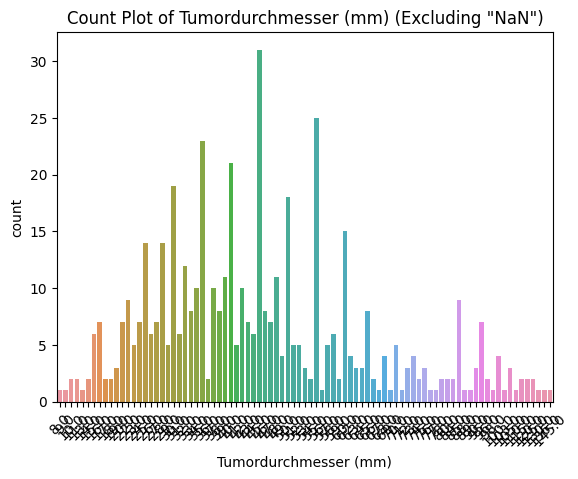

In [398]:
# Filter out rows with "n.a." values in the 'Tumordurchmesser (mm)' column
numeric_df = df[df['Tumordurchmesser (mm)'] != 'NaN']

# Create a count plot for the numeric values in the 'Tumordurchmesser (mm)' column
sns.countplot(data=numeric_df, x='Tumordurchmesser (mm)')
plt.title('Count Plot of Tumordurchmesser (mm) (Excluding "NaN")')
plt.xlabel('Tumordurchmesser (mm)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Count how many "n.a." values there are
na_count = len(df) - len(numeric_df)
print(f'Number of "NaN" values: {na_count}')

plt.show()


Number of "NaN" values: 19


/var/folders/wz/d4sltz8j5g921kkhbdghhw5r0000gq/T/ipykernel_11834/1491684806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['Tumordurchmesser (mm)'] = pd.to_numeric(numeric_df['Tumordurchmesser (mm)'])
/var/folders/wz/d4sltz8j5g921kkhbdghhw5r0000gq/T/ipykernel_11834/1491684806.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=numeric_df, x='Tumordurchmesser (mm)', shade=True)
/opt/anaconda3/envs/pre-processing/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  i

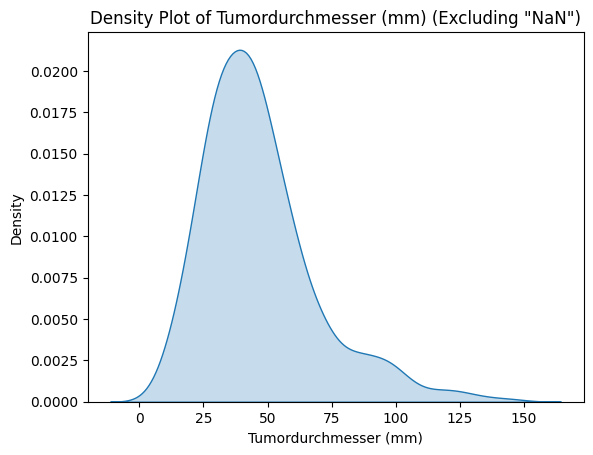

In [399]:
# Filter out "n.a." values and convert the column to numeric
numeric_df = df[df['Tumordurchmesser (mm)'] != 'NaN']
numeric_df['Tumordurchmesser (mm)'] = pd.to_numeric(numeric_df['Tumordurchmesser (mm)'])

# Create a density plot for the numeric values
sns.kdeplot(data=numeric_df, x='Tumordurchmesser (mm)', shade=True)
plt.title('Density Plot of Tumordurchmesser (mm) (Excluding "NaN")')
plt.xlabel('Tumordurchmesser (mm)')

# Count how many "n.a." values there are
na_count = len(df) - len(numeric_df)
print(f'Number of "NaN" values: {na_count}')

plt.show()


In [401]:
# Filter out "n.a." values and convert the column to numeric
df['Tumordurchmesser (mm)'] = pd.to_numeric(df['Tumordurchmesser (mm)'], errors='coerce')  # Convert to numeric, ignore errors
numeric_df = df[~df['Tumordurchmesser (mm)'].isna()]  # Filter out "n.a." values

# Define the minimum and maximum values in the "Tumordurchmesser (mm)" column
min_value = numeric_df['Tumordurchmesser (mm)'].min()
max_value = numeric_df['Tumordurchmesser (mm)'].max()

# Calculate the bin edges to create equal-width non-overlapping bins
num_bins = 4  # Number of bins
bin_width = (max_value - min_value) / num_bins
bin_edges = [min_value + i * bin_width for i in range(num_bins)]
bin_edges.append(max_value)

# Create labels for the groups
group_labels = [f"Group {i + 1}" for i in range(num_bins)]

# Create a new column with the group labels
df['Tumor Size Group'] = pd.cut(numeric_df['Tumordurchmesser (mm)'], bins=bin_edges, labels=group_labels)

# Count how many values fall into each group
group_counts = df['Tumor Size Group'].value_counts()

# Display the group counts
print(group_counts)


Tumor Size Group
Group 1    247
Group 2    206
Group 3     40
Group 4      9
Name: count, dtype: int64


In [402]:
# Display the bin edges 
print(bin_edges)

[8.0, 42.25, 76.5, 110.75, 145.0]


In [403]:
# Filter out "n.a." values and convert the column to numeric
df['Tumordurchmesser (mm)'] = pd.to_numeric(df['Tumordurchmesser (mm)'], errors='coerce')  # Convert to numeric, ignore errors
numeric_df = df[~df['Tumordurchmesser (mm)'].isna()]  # Filter out "n.a." values

# Define the minimum and maximum values in the "Tumordurchmesser (mm)" column
min_value = numeric_df['Tumordurchmesser (mm)'].min()
max_value = numeric_df['Tumordurchmesser (mm)'].max()

# Calculate the bin edges to create equal-width non-overlapping bins
num_bins = 4  # Number of bins
bin_width = (max_value - min_value) / num_bins
bin_edges = [min_value + i * bin_width for i in range(num_bins)]
bin_edges.append(max_value)

# Create labels for the groups
group_labels = [f"Group {i + 1}" for i in range(num_bins)]

# Create a new column with the group labels
df['Tumor Size Group'] = pd.cut(numeric_df['Tumordurchmesser (mm)'], bins=bin_edges, labels=bin_edges[:-1])

# Count how many values fall into each group
group_counts = df['Tumor Size Group'].value_counts()

# Display the group counts
print(group_counts)

Tumor Size Group
8.0       247
42.25     206
76.5       40
110.75      9
Name: count, dtype: int64


In [404]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['pT group', 'Tumor Size Group']).size()

# Display the summary
print(summary)

pT group  Tumor Size Group
NaN       8.0                   3
          42.25                 2
          76.5                  0
          110.75                0
pT1       8.0                  18
          42.25                 1
          76.5                  0
          110.75                0
pT2       8.0                  58
          42.25                35
          76.5                  4
          110.75                1
pT3       8.0                 133
          42.25               112
          76.5                 18
          110.75                3
pT4       8.0                  35
          42.25                56
          76.5                 18
          110.75                5
dtype: int64


/var/folders/wz/d4sltz8j5g921kkhbdghhw5r0000gq/T/ipykernel_11834/3123646922.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(['pT group', 'Tumor Size Group']).size()


In [493]:
# Group the data by 'pT group' and 'Sex' and count the occurrences
grouped_counts = df.groupby(['pT group', 'Tumor Size Group']).size()

# Group the data by 'pT group' and calculate the total count for each 'pT group'
pT_group_total_counts = df.groupby('pT group').size()

# Calculate the percentages within each 'pT group' and round to the nearest whole number
pT_group_percentages = (grouped_counts / pT_group_total_counts * 100).round().astype(int)

# Display the percentages for each 'pT group'
print(pT_group_percentages)


pT group  Tumor Size Group
NaN       8.0                 38
          42.25               25
          76.5                 0
          110.75               0
pT1       8.0                 86
          42.25                5
          76.5                 0
          110.75               0
pT2       8.0                 56
          42.25               34
          76.5                 4
          110.75               1
pT3       8.0                 49
          42.25               41
          76.5                 7
          110.75               1
pT4       8.0                 30
          42.25               47
          76.5                15
          110.75               4
dtype: int64


/var/folders/wz/d4sltz8j5g921kkhbdghhw5r0000gq/T/ipykernel_11834/262119784.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby(['pT group', 'Tumor Size Group']).size()


In [492]:
# Group the data by 'pT group' and calculate median and range for 'Tumordiameter'
agg_summary = df.groupby('pT group')['Tumordurchmesser (mm)'].agg(['median', 'min', 'max'])

# Display the aggregated summary
print(agg_summary)


          median   min    max
pT group                     
NaN         28.0  10.0   48.0
pT1         25.0  11.0   72.0
pT2         35.0  11.0  120.0
pT3         42.0   8.0  145.0
pT4         50.5  16.0  136.0


In [409]:
# Remove the column with the age 
df.loc[df['Age']==-13, 'Age'] = None

In [410]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['Age']).size()

# Display the summary
print(summary)

Age
18.0     1
26.0     1
28.0     2
29.0     1
32.0     1
34.0     4
37.0     1
38.0     1
39.0     3
41.0     1
42.0     2
43.0     3
44.0     4
45.0     4
46.0     3
47.0     1
48.0     1
49.0     4
50.0     2
51.0     3
52.0     5
53.0     4
54.0     3
55.0     4
56.0     8
57.0    12
58.0     7
59.0    11
60.0    16
61.0    12
62.0    12
63.0    15
64.0     9
65.0    14
66.0    20
67.0    12
68.0    12
69.0    11
70.0    14
71.0    17
72.0    20
73.0    20
74.0    19
75.0    10
76.0    15
77.0    23
78.0    17
79.0    15
80.0    13
81.0    10
82.0    22
83.0     8
84.0    10
85.0    11
86.0     6
87.0    12
88.0     7
89.0     5
90.0     8
91.0     1
92.0     3
93.0     1
94.0     1
95.0     2
99.0     1
dtype: int64


/opt/anaconda3/envs/pre-processing/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/pre-processing/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/pre-processing/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Number of "n.a." values: 0


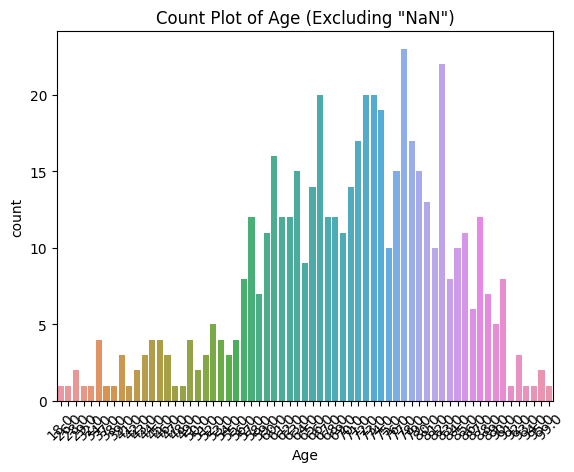

In [411]:
# Filter out rows with "n.a." values in the 'Tumordurchmesser (mm)' column
numeric_df = df[df['Age'] != 'NaN']

# Create a count plot for the numeric values in the 'Tumordurchmesser (mm)' column
sns.countplot(data=numeric_df, x='Age')
plt.title('Count Plot of Age (Excluding "NaN")')
plt.xlabel('Age')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Count how many "n.a." values there are
na_count = len(df) - len(numeric_df)
print(f'Number of "n.a." values: {na_count}')

plt.show()

Number of "NaN" values: 0


/var/folders/wz/d4sltz8j5g921kkhbdghhw5r0000gq/T/ipykernel_11834/647745505.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=numeric_df, x='Age', shade=True)
/opt/anaconda3/envs/pre-processing/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/pre-processing/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


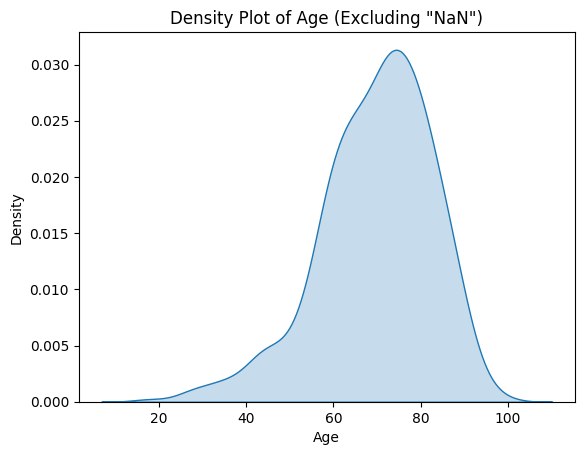

In [413]:
# Filter out "n.a." values and convert the column to numeric
numeric_df = df[df['Age'] != 'NaN']
numeric_df['Age'] = pd.to_numeric(numeric_df['Age'])

# Create a density plot for the numeric values
sns.kdeplot(data=numeric_df, x='Age', shade=True)
plt.title('Density Plot of Age (Excluding "NaN")')
plt.xlabel('Age')

# Count how many "n.a." values there are
na_count = len(df) - len(numeric_df)
print(f'Number of "NaN" values: {na_count}')

plt.show()

In [414]:
# Define the cutoff value
cutoff = 70

# Create two groups based on the cutoff value
df['Age Group'] = pd.cut(df['Age'], bins=[-float('inf'), cutoff, float('inf')], labels=['Under 70', '70 and Over'])

# Get a summary of the "Age Group" column
summary = df['Age Group'].value_counts()

# Display the summary
print(summary)

Age Group
70 and Over    277
Under 70       244
Name: count, dtype: int64


In [415]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['pT group', 'Age Group']).size()

# Display the summary
print(summary)

pT group  Age Group  
NaN       Under 70         5
          70 and Over      3
pT1       Under 70         9
          70 and Over     12
pT2       Under 70        46
          70 and Over     56
pT3       Under 70       126
          70 and Over    146
pT4       Under 70        58
          70 and Over     60
dtype: int64


/var/folders/wz/d4sltz8j5g921kkhbdghhw5r0000gq/T/ipykernel_11834/1774536351.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(['pT group', 'Age Group']).size()


In [494]:
# Group the data by 'pT group' and 'Sex' and count the occurrences
grouped_counts = df.groupby(['pT group', 'Age Group']).size()

# Group the data by 'pT group' and calculate the total count for each 'pT group'
pT_group_total_counts = df.groupby('pT group').size()

# Calculate the percentages within each 'pT group' and round to the nearest whole number
pT_group_percentages = (grouped_counts / pT_group_total_counts * 100).round().astype(int)

# Display the percentages for each 'pT group'
print(pT_group_percentages)


pT group  Age Group  
NaN       Under 70       62
          70 and Over    38
pT1       Under 70       43
          70 and Over    57
pT2       Under 70       45
          70 and Over    54
pT3       Under 70       46
          70 and Over    54
pT4       Under 70       49
          70 and Over    51
dtype: int64


/var/folders/wz/d4sltz8j5g921kkhbdghhw5r0000gq/T/ipykernel_11834/928558331.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby(['pT group', 'Age Group']).size()


In [475]:
# Group the data by 'pT group' and calculate median and range for 'Tumordiameter'
agg_summary = df.groupby('pT group')['Age'].agg(['median', 'min', 'max'])

# Display the aggregated summary
print(agg_summary)


          median   min   max
pT group                    
NaN         68.0  57.0  87.0
pT1         72.0  45.0  89.0
pT2         71.5  28.0  90.0
pT3         72.0  26.0  99.0
pT4         71.0  18.0  94.0


In [417]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['Muzinöse Tumorkomponente'].value_counts()

# Display the summary
print(summary)

Muzinöse Tumorkomponente
x         189
0         108
<5%        99
0.05       20
0.3        16
0.1        15
0.2        13
gering     13
0.4         9
<10%        6
0.6         4
0.9         4
0.5         3
0.15        3
0.7         3
0.8         3
0.45        2
0.85        2
<2%         1
>5%         1
0.25        1
0.03        1
1           1
pT3         1
0.07        1
<1%         1
NaN         1
hoch        1
Name: count, dtype: int64


In [418]:
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("<5%", "< 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("<10%", "< 0.10")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("<2%", "< 0.02")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace(">5%", "> 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("<1%", "< 0.01")

In [421]:
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("0.3", "> 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("0.1", "> 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("0.2", "> 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("0.4", "> 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("0.6", "> 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("0.9", "> 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("0.15", "> 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("0.7", "> 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("0.8", "> 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("0.5", "> 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("0.45", "> 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("0.85", "> 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("0.03", "< 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("< 0.02", "< 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("0.25", "> 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("1", "> 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("pT3", "n.a.")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("0.07", "> 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("< 0.01", "< 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("x", "n.a.")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("< 0.10", "> 0.05")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("hoch", "NaN")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("gering", "NaN")
df['Muzinöse Tumorkomponente'] = df['Muzinöse Tumorkomponente'].replace("n.a.", "NaN")


In [422]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['Muzinöse Tumorkomponente'].value_counts()

# Display the summary
print(summary)

Muzinöse Tumorkomponente
NaN       205
0         108
< 0.05    102
> 0.05     87
0.05       20
Name: count, dtype: int64


In [423]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['pT group', 'Muzinöse Tumorkomponente']).size()

# Display the summary
print(summary)

pT group  Muzinöse Tumorkomponente
NaN       > 0.05                        1
          NaN                           7
pT1       0                             4
          0.05                          1
          < 0.05                        5
          > 0.05                        1
          NaN                          10
pT2       0                            22
          0.05                          8
          < 0.05                       28
          > 0.05                       14
          NaN                          31
pT3       0                            60
          0.05                          4
          < 0.05                       53
          > 0.05                       44
          NaN                         111
pT4       0                            22
          0.05                          7
          < 0.05                       16
          > 0.05                       27
          NaN                          46
dtype: int64


In [495]:
# Group the data by 'pT group' and 'Sex' and count the occurrences
grouped_counts = df.groupby(['pT group', 'Muzinöse Tumorkomponente']).size()

# Group the data by 'pT group' and calculate the total count for each 'pT group'
pT_group_total_counts = df.groupby('pT group').size()

# Calculate the percentages within each 'pT group' and round to the nearest whole number
pT_group_percentages = (grouped_counts / pT_group_total_counts * 100).round().astype(int)

# Display the percentages for each 'pT group'
print(pT_group_percentages)


pT group  Muzinöse Tumorkomponente
NaN       > 0.05                      12
          NaN                         88
pT1       0                           19
          0.05                         5
          < 0.05                      24
          > 0.05                       5
          NaN                         48
pT2       0                           21
          0.05                         8
          < 0.05                      27
          > 0.05                      14
          NaN                         30
pT3       0                           22
          0.05                         1
          < 0.05                      19
          > 0.05                      16
          NaN                         41
pT4       0                           19
          0.05                         6
          < 0.05                      14
          > 0.05                      23
          NaN                         39
dtype: int64


In [425]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['Infiltrationstyp'].value_counts()

# Display the summary
print(summary)

Infiltrationstyp
expansiv                             214
infiltrativ                          140
x                                    126
teils expansiv, teils infiltrativ     28
teils infiltrativ, teils expansiv     14
Name: count, dtype: int64


In [426]:
df['Infiltrationstyp'] = df['Infiltrationstyp'].replace("teils expansiv, teils infiltrativ", "teils infiltrativ, teils expansiv")
df['Infiltrationstyp'] = df['Infiltrationstyp'].replace("x", "NaN")

In [427]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['Infiltrationstyp'].value_counts()

# Display the summary
print(summary)

Infiltrationstyp
expansiv                             214
infiltrativ                          140
NaN                                  126
teils infiltrativ, teils expansiv     42
Name: count, dtype: int64


In [428]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['pT group', 'Infiltrationstyp']).size()

# Display the summary
print(summary)

pT group  Infiltrationstyp                 
NaN       NaN                                    7
          expansiv                               1
pT1       NaN                                    6
          expansiv                              11
          infiltrativ                            3
          teils infiltrativ, teils expansiv      1
pT2       NaN                                   17
          expansiv                              63
          infiltrativ                           20
          teils infiltrativ, teils expansiv      3
pT3       NaN                                   66
          expansiv                             109
          infiltrativ                           74
          teils infiltrativ, teils expansiv     23
pT4       NaN                                   30
          expansiv                              30
          infiltrativ                           43
          teils infiltrativ, teils expansiv     15
dtype: int64


In [496]:
# Group the data by 'pT group' and 'Sex' and count the occurrences
grouped_counts = df.groupby(['pT group', 'Infiltrationstyp']).size()

# Group the data by 'pT group' and calculate the total count for each 'pT group'
pT_group_total_counts = df.groupby('pT group').size()

# Calculate the percentages within each 'pT group' and round to the nearest whole number
pT_group_percentages = (grouped_counts / pT_group_total_counts * 100).round().astype(int)

# Display the percentages for each 'pT group'
print(pT_group_percentages)


pT group  Infiltrationstyp                 
NaN       NaN                                  88
          expansiv                             12
pT1       NaN                                  29
          expansiv                             52
          infiltrativ                          14
          teils infiltrativ, teils expansiv     5
pT2       NaN                                  17
          expansiv                             61
          infiltrativ                          19
          teils infiltrativ, teils expansiv     3
pT3       NaN                                  24
          expansiv                             40
          infiltrativ                          27
          teils infiltrativ, teils expansiv     8
pT4       NaN                                  25
          expansiv                             25
          infiltrativ                          36
          teils infiltrativ, teils expansiv    13
dtype: int64


In [477]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['Tumorbudding'].value_counts()

# Display the summary
print(summary)

Tumorbudding
gering    217
NaN       177
hoch      109
mäßig      19
Name: count, dtype: int64


In [476]:
df['Tumorbudding'] = df['Tumorbudding'].replace("x", "NaN")
df['Tumorbudding'] = df['Tumorbudding'].replace("<50%", "NaN")
df['Tumorbudding'] = df['Tumorbudding'].replace(">50%", "NaN")
df['Tumorbudding'] = df['Tumorbudding'].replace("m", "NaN")
df['Tumorbudding'] = df['Tumorbudding'].replace("moderat", "mäßig")

In [478]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['pT group', 'Tumorbudding']).size()

# Display the summary
print(summary)

pT group  Tumorbudding
NaN       NaN               7
          gering            1
pT1       NaN               8
          gering           13
pT2       NaN              25
          gering           62
          hoch             13
          mäßig             3
pT3       NaN              96
          gering          111
          hoch             55
          mäßig            10
pT4       NaN              41
          gering           30
          hoch             41
          mäßig             6
dtype: int64


In [497]:
# Group the data by 'pT group' and 'Sex' and count the occurrences
grouped_counts = df.groupby(['pT group', 'Tumorbudding']).size()

# Group the data by 'pT group' and calculate the total count for each 'pT group'
pT_group_total_counts = df.groupby('pT group').size()

# Calculate the percentages within each 'pT group' and round to the nearest whole number
pT_group_percentages = (grouped_counts / pT_group_total_counts * 100).round().astype(int)

# Display the percentages for each 'pT group'
print(pT_group_percentages)

pT group  Tumorbudding
NaN       NaN             88
          gering          12
pT1       NaN             38
          gering          62
pT2       NaN             24
          gering          60
          hoch            13
          mäßig            3
pT3       NaN             35
          gering          41
          hoch            20
          mäßig            4
pT4       NaN             35
          gering          25
          hoch            35
          mäßig            5
dtype: int64


In [471]:
df['Peritumorale lymphozytäre Infiltration'] = df['Peritumorale lymphozytäre Infiltration'].replace("x", "n.a.")

# Get a summary of the "Tumorlokalisation COL10" column
summary = df['Peritumorale lymphozytäre Infiltration'].value_counts()

# Display the summary
print(summary)

Peritumorale lymphozytäre Infiltration
gering                                                                                                                                                           241
NaN                                                                                                                                                              150
hoch                                                                                                                                                              51
mäßig                                                                                                                                                             49
stark                                                                                                                                                             19
ausgeprägt                                                                                                                              

In [470]:
df['Peritumorale lymphozytäre Infiltration'] = df['Peritumorale lymphozytäre Infiltration'].replace("n.a.", "NaN")

In [437]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['Angioinvasion V RED'].value_counts()

# Display the summary
print(summary)

Angioinvasion V RED
V0     340
V+     171
NaN     11
Name: count, dtype: int64


In [438]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['pT group', 'Angioinvasion V RED']).size()

# Display the summary
print(summary)

pT group  Angioinvasion V RED
NaN       NaN                      5
          V+                       1
          V0                       2
pT1       NaN                      1
          V0                      20
pT2       NaN                      1
          V+                      11
          V0                      91
pT3       NaN                      3
          V+                      97
          V0                     172
pT4       NaN                      1
          V+                      62
          V0                      55
dtype: int64


In [499]:
# Group the data by 'pT group' and 'Sex' and count the occurrences
grouped_counts = df.groupby(['pT group', 'Angioinvasion V RED']).size()

# Group the data by 'pT group' and calculate the total count for each 'pT group'
pT_group_total_counts = df.groupby('pT group').size()

# Calculate the percentages within each 'pT group' and round to the nearest whole number
pT_group_percentages = (grouped_counts / pT_group_total_counts * 100).round().astype(int)

# Display the percentages for each 'pT group'
print(pT_group_percentages)

pT group  Angioinvasion V RED
NaN       NaN                    62
          V+                     12
          V0                     25
pT1       NaN                     5
          V0                     95
pT2       NaN                     1
          V+                     11
          V0                     88
pT3       NaN                     1
          V+                     36
          V0                     63
pT4       NaN                     1
          V+                     53
          V0                     47
dtype: int64


In [440]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['Lymphbahninvasion L'].value_counts()

# Display the summary
print(summary)

Lymphbahninvasion L
L1     255
L0     229
NaN     38
Name: count, dtype: int64


In [441]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['pT group', 'Lymphbahninvasion L']).size()

# Display the summary
print(summary)

pT group  Lymphbahninvasion L
NaN       L0                       2
          L1                       1
          NaN                      5
pT1       L0                      18
          L1                       2
          NaN                      1
pT2       L0                      71
          L1                      27
          NaN                      5
pT3       L0                     109
          L1                     141
          NaN                     22
pT4       L0                      29
          L1                      84
          NaN                      5
dtype: int64


In [500]:
# Group the data by 'pT group' and 'Sex' and count the occurrences
grouped_counts = df.groupby(['pT group', 'Lymphbahninvasion L']).size()

# Group the data by 'pT group' and calculate the total count for each 'pT group'
pT_group_total_counts = df.groupby('pT group').size()

# Calculate the percentages within each 'pT group' and round to the nearest whole number
pT_group_percentages = (grouped_counts / pT_group_total_counts * 100).round().astype(int)

# Display the percentages for each 'pT group'
print(pT_group_percentages)

pT group  Lymphbahninvasion L
NaN       L0                     25
          L1                     12
          NaN                    62
pT1       L0                     86
          L1                     10
          NaN                     5
pT2       L0                     69
          L1                     26
          NaN                     5
pT3       L0                     40
          L1                     52
          NaN                     8
pT4       L0                     25
          L1                     71
          NaN                     4
dtype: int64


In [446]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['MSI im Befund'].value_counts()

# Display the summary
print(summary)

MSI im Befund
NaN         313
MSI nein    193
MSI ja       16
Name: count, dtype: int64


In [445]:
df['MSI im Befund'] = df['MSI im Befund'].replace("n.a.", "NaN")

In [447]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['pT group', 'MSI im Befund']).size()

# Display the summary
print(summary)

pT group  MSI im Befund
NaN       MSI nein           3
          NaN                5
pT1       MSI nein          10
          NaN               11
pT2       MSI ja             2
          MSI nein          36
          NaN               65
pT3       MSI ja             6
          MSI nein         101
          NaN              165
pT4       MSI ja             8
          MSI nein          43
          NaN               67
dtype: int64


In [448]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['MSI gesamt RED'].value_counts()

# Display the summary
print(summary)

MSI gesamt RED
stabil      381
NaN         117
instabil     24
Name: count, dtype: int64


In [449]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['pT group', 'MSI gesamt RED']).size()

# Display the summary
print(summary)

pT group  MSI gesamt RED
NaN       NaN                 3
          stabil              5
pT1       NaN                 3
          instabil            2
          stabil             16
pT2       NaN                14
          instabil            4
          stabil             85
pT3       NaN                66
          instabil           10
          stabil            196
pT4       NaN                31
          instabil            8
          stabil             79
dtype: int64


In [501]:
# Group the data by 'pT group' and 'Sex' and count the occurrences
grouped_counts = df.groupby(['pT group', 'MSI gesamt RED']).size()

# Group the data by 'pT group' and calculate the total count for each 'pT group'
pT_group_total_counts = df.groupby('pT group').size()

# Calculate the percentages within each 'pT group' and round to the nearest whole number
pT_group_percentages = (grouped_counts / pT_group_total_counts * 100).round().astype(int)

# Display the percentages for each 'pT group'
print(pT_group_percentages)

pT group  MSI gesamt RED
NaN       NaN               38
          stabil            62
pT1       NaN               14
          instabil          10
          stabil            76
pT2       NaN               14
          instabil           4
          stabil            83
pT3       NaN               24
          instabil           4
          stabil            72
pT4       NaN               26
          instabil           7
          stabil            67
dtype: int64


In [455]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['RAS Mutation RED'].value_counts()

# Display the summary
print(summary)

RAS Mutation RED
wt           268
codon 12     155
NaN           49
codon 13      35
codon 61      10
codon 146      4
codon 117      1
Name: count, dtype: int64


In [452]:
df['RAS Mutation RED'] = df['RAS Mutation RED'].replace("n.a.", "NaN")

In [454]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['RAS Mutation RED 2'].value_counts()

# Display the summary
print(summary)

RAS Mutation RED 2
wt          268
RAS Mut.    205
NaN          49
Name: count, dtype: int64


In [456]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['pT group', 'RAS Mutation RED 2']).size()

# Display the summary
print(summary)

pT group  RAS Mutation RED 2
NaN       NaN                     2
          RAS Mut.                2
          wt                      4
pT1       NaN                     3
          RAS Mut.                5
          wt                     13
pT2       NaN                     7
          RAS Mut.               46
          wt                     50
pT3       NaN                    29
          RAS Mut.              107
          wt                    136
pT4       NaN                     8
          RAS Mut.               45
          wt                     65
dtype: int64


In [502]:
# Group the data by 'pT group' and 'Sex' and count the occurrences
grouped_counts = df.groupby(['pT group', 'RAS Mutation RED 2']).size()

# Group the data by 'pT group' and calculate the total count for each 'pT group'
pT_group_total_counts = df.groupby('pT group').size()

# Calculate the percentages within each 'pT group' and round to the nearest whole number
pT_group_percentages = (grouped_counts / pT_group_total_counts * 100).round().astype(int)

# Display the percentages for each 'pT group'
print(pT_group_percentages)

pT group  RAS Mutation RED 2
NaN       NaN                   25
          RAS Mut.              25
          wt                    50
pT1       NaN                   14
          RAS Mut.              24
          wt                    62
pT2       NaN                    7
          RAS Mut.              45
          wt                    49
pT3       NaN                   11
          RAS Mut.              39
          wt                    50
pT4       NaN                    7
          RAS Mut.              38
          wt                    55
dtype: int64


In [458]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['BRAF Mutation RED'].value_counts()

# Display the summary
print(summary)

BRAF Mutation RED
NaN           505
BRAF V600E      9
wt              8
Name: count, dtype: int64


In [459]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['pT group', 'BRAF Mutation RED']).size()

# Display the summary
print(summary)

pT group  BRAF Mutation RED
NaN       NaN                    8
pT1       NaN                   21
pT2       NaN                  102
          wt                     1
pT3       BRAF V600E             3
          NaN                  265
          wt                     4
pT4       BRAF V600E             6
          NaN                  109
          wt                     3
dtype: int64


In [503]:
# Group the data by 'pT group' and 'Sex' and count the occurrences
grouped_counts = df.groupby(['pT group', 'BRAF Mutation RED']).size()

# Group the data by 'pT group' and calculate the total count for each 'pT group'
pT_group_total_counts = df.groupby('pT group').size()

# Calculate the percentages within each 'pT group' and round to the nearest whole number
pT_group_percentages = (grouped_counts / pT_group_total_counts * 100).round().astype(int)

# Display the percentages for each 'pT group'
print(pT_group_percentages)

pT group  BRAF Mutation RED
NaN       NaN                  100
pT1       NaN                  100
pT2       NaN                   99
          wt                     1
pT3       BRAF V600E             1
          NaN                   97
          wt                     1
pT4       BRAF V600E             5
          NaN                   92
          wt                     3
dtype: int64


In [461]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['HER2 Amplifikation'].value_counts()

# Display the summary
print(summary)

HER2 Amplifikation
nein    449
x        58
ja       15
Name: count, dtype: int64


In [462]:
df['HER2 Amplifikation'] = df['HER2 Amplifikation'].replace("x", "NaN")

In [463]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['HER2 Amplifikation'].value_counts()

# Display the summary
print(summary)

HER2 Amplifikation
nein    449
NaN      58
ja       15
Name: count, dtype: int64


In [464]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['pT group', 'HER2 Amplifikation']).size()

# Display the summary
print(summary)

pT group  HER2 Amplifikation
NaN       NaN                     2
          nein                    6
pT1       NaN                     3
          ja                      1
          nein                   17
pT2       NaN                     7
          ja                      4
          nein                   92
pT3       NaN                    33
          ja                      6
          nein                  233
pT4       NaN                    13
          ja                      4
          nein                  101
dtype: int64


In [505]:
# Group the data by 'pT group' and 'Sex' and count the occurrences
grouped_counts = df.groupby(['pT group', 'HER2 Amplifikation']).size()

# Group the data by 'pT group' and calculate the total count for each 'pT group'
pT_group_total_counts = df.groupby('pT group').size()

# Calculate the percentages within each 'pT group' and round to the nearest whole number
pT_group_percentages = (grouped_counts / pT_group_total_counts * 100).round().astype(int)

# Display the percentages for each 'pT group'
print(pT_group_percentages)

pT group  HER2 Amplifikation
NaN       NaN                   25
          nein                  75
pT1       NaN                   14
          ja                     5
          nein                  81
pT2       NaN                    7
          ja                     4
          nein                  89
pT3       NaN                   12
          ja                     2
          nein                  86
pT4       NaN                   11
          ja                     3
          nein                  86
dtype: int64


In [466]:
# Get a summary of the "Tumorlokalisation COL10" column
summary = df['Sex'].value_counts()

# Display the summary
print(summary)

Sex
m    278
w    244
Name: count, dtype: int64


In [467]:
# Group the data by both "pT group" and "pN group" and count the occurrences
summary = df.groupby(['pT group', 'Sex']).size()

# Display the summary
print(summary)

pT group  Sex
NaN       m        6
          w        2
pT1       m       12
          w        9
pT2       m       57
          w       46
pT3       m      151
          w      121
pT4       m       52
          w       66
dtype: int64


In [481]:
# Group the data by 'pT group' and 'Sex' and count the occurrences
grouped_counts = df.groupby(['pT group', 'Sex']).size()

# Group the data by 'pT group' and calculate the total count for each 'pT group'
pT_group_total_counts = df.groupby('pT group').size()

# Calculate the percentages within each 'pT group' and round to the nearest whole number
pT_group_percentages = (grouped_counts / pT_group_total_counts * 100).round().astype(int)

# Display the percentages for each 'pT group'
print(pT_group_percentages)

pT group  Sex
NaN       m      75
          w      25
pT1       m      57
          w      43
pT2       m      55
          w      45
pT3       m      56
          w      44
pT4       m      44
          w      56
dtype: int64


In [489]:
# Remove the space between a letter and a digit in the "TMA Localisation" column
df['TMA Localisation'] = df['TMA Localisation'].str.replace(r'(\D) (\d)', r'\1\2', regex=True)

In [507]:
# Specify the path for the CSV file
csv_file_path = '/Users/teresaglauner/Documents/Hamburg_folder/CRC_TMA/summary_clinical_data_modified.csv'

# Save the DataFrame to the specified CSV file
df.to_csv(csv_file_path, index=False)

print(f"Folder names have been saved to {csv_file_path}.")

Folder names have been saved to /Users/teresaglauner/Documents/Hamburg_folder/CRC_TMA/summary_clinical_data_modified.csv.


In [508]:
# Specify the path for the Excel file
excel_file_path = '/Users/teresaglauner/Documents/Hamburg_folder/CRC_TMA/summary_clinical_data_modified.xlsx'

# Save the DataFrame to the specified Excel file
df.to_excel(excel_file_path, index=False)

print(f"Data has been saved to {excel_file_path}.")


Data has been saved to /Users/teresaglauner/Documents/Hamburg_folder/CRC_TMA/summary_clinical_data_modified.xlsx.
